In [0]:
# here we 1. explore the region (top k of total $, top k of potential market) 2. explore within JUUL, what is the most popular products 3. products trend over time, region
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
def three_df_overlay_line_plot(x,y1,df1,y2,df2,y3 = None,df3=None, title = ''):
  ax = df1.plot(x=x,y=y1,figsize  = (15,10),fontsize=20)
  df2.plot(ax=ax,x=x,y=y2,figsize  = (15,10),fontsize=20)
  if y3:
    df3.plot(ax=ax,x=x,y=y3,figsize  = (15,10),fontsize=20)
  ax.set_ylabel(y1, fontsize=20)
  ax.set_xlabel(x, fontsize=20)
  ax.set_title(title,fontsize = 25)
  if y3:
    ax.legend([df1.SKU[0] + ' ' + y1, df2.SKU[0] +' ' +y2, df3.SKU[0] +' ' +y3],loc='upper left', fontsize = 20)  
  else:
    ax.legend([df1.SKU[0] + ' ' + y1, df2.SKU[0] +' ' +y2],loc='upper left', fontsize = 20)
  plt.tight_layout()

def general_line_plot(x,y,df,title = ''):
  fig = df.plot(x=x,y=y,figsize  = (15,10),fontsize=20)
  fig.set_ylabel(y, fontsize=20)
  fig.set_xlabel(x, fontsize=20)
  fig.set_title(title,fontsize = 25)
  fig.legend(loc='upper left', fontsize = 20)
  plt.tight_layout()

In [265]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
df_RMA = pd.read_csv('/content/drive/My Drive/Python/dataSet/Juul/DATA_RMA_only_clean1.csv')
df_RMA.head()

,Unnamed: 0,Dollar Sales,Geography,Product,SKU,Time,Unit Sales
0,0,28921840.49,Circle K Florida-RMA - Conv,CIGARETTES,Cigarettes Total,1/31/2016,4968512.070
1,1,30276220.80,Circle K Florida-RMA - Conv,CIGARETTES,Cigarettes Total,2/28/2016,5139634.753
2,2,31535167.82,Circle K Florida-RMA - Conv,CIGARETTES,Cigarettes Total,3/27/2016,5366848.000
3,3,31693487.95,Circle K Florida-RMA - Conv,CIGARETTES,Cigarettes Total,4/24/2016,5420033.091
4,4,31390945.73,Circle K Florida-RMA - Conv,CIGARETTES,Cigarettes Total,5/22/2016,5380230.139


In [267]:
df_RMA['Geography'].unique(), len(df_RMA['Geography'].unique())

(array(['Circle K Florida-RMA - Conv', 'Circle K Gulf-RMA - Conv',
        'Circle K Midwest-RMA - Conv',
        'Circle K South Atlantic-RMA - Conv',
        'Circle K Southeast-RMA - Conv', 'Circle K Southwest-RMA - Conv',
        'Circle K - Circle K Great Lakes Total-RMA - Conv',
        'Circle K - Circle K Arizona Non-Metro-RMA - Conv',
        'Circle K - Circle K Heartland-RMA - Conv',
        'Circle K - Circle K Las Vegas, NV-RMA - Conv',
        'Circle K - Circle K Northeast-RMA - Conv',
        'Circle K - Circle K Phoenix, AZ Metro-RMA - Conv',
        'Circle K - Circle K Tucson, AZ-RMA - Conv',
        'Circle K - Circle K Western-RMA - Conv', 'Arrow Mart-RMA - Conv',
        'BP Arizona-RMA - Conv', 'BP Central/South California-RMA - Conv',
        'BP Los Angeles, CA-RMA - Conv', 'BP Nevada-RMA - Conv',
        'BP Northern California-RMA - Conv',
        'BP Pacific Northwest-RMA - Conv', 'CST Brands Arizona-RMA - Conv',
        'CST Brands Arkansas-RMA - Conv',
   

In [268]:
df_Geo_SKU= pd.DataFrame(df_RMA.groupby(by=['Geography','SKU'],as_index=False)['Dollar Sales', 'Unit Sales'].sum())
df_Geo_SKU.head()

,Geography,SKU,Dollar Sales,Unit Sales
0,Arrow Mart-RMA - Conv,Cigarettes Total,9.908565e+06,1.034397e+06
1,Arrow Mart-RMA - Conv,E-Cigs Total,4.601097e+04,4.689697e+03
2,BP Arizona-RMA - Conv,Cigarettes Total,2.583441e+07,3.756195e+06
3,BP Arizona-RMA - Conv,E-Cigs Total,1.104043e+06,8.452471e+04
4,BP Arizona-RMA - Conv,JUUL Devices,1.553890e+05,3.494012e+03


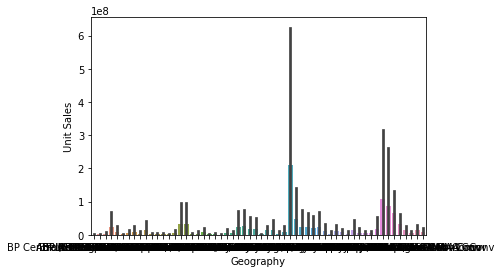

In [269]:
sns.barplot(df_Geo_SKU['Geography'], df_Geo_SKU['Unit Sales'])

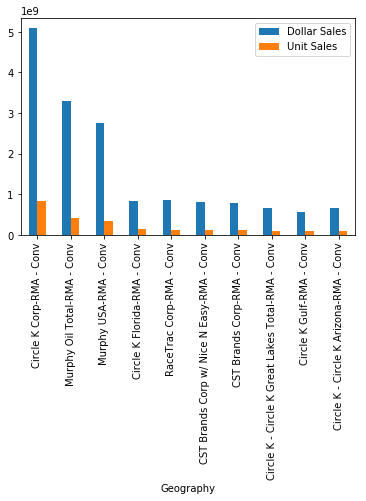

In [270]:
df_Geo_SKU = df_Geo_SKU.sort_values(by = 'Unit Sales', ascending=False)
df_Geo_SKU[:10].plot(x = 'Geography',kind='bar')

In [0]:
def barplot_topk(x, df, sortby = 'Dollar Sales', k =10,title='',SKU = None, y = None): # k positive, top k; k negative, bottom k
  if SKU:
    df = df[df['SKU']==SKU]
  
  if k>0:
    df_temp = df.sort_values(by = sortby, ascending=False)
    ax = df_temp[:k].plot(x = x,y=y, kind = 'bar',figsize  = (15,15),fontsize=20)
  else:
    df_temp = df.sort_values(by = sortby, ascending=True)
    ax = df_temp[:-k].plot(x = x,y=y, kind = 'bar',figsize  = (15,15),fontsize=20)
   # ax.set_ylabel(y, fontsize=20)
  ax.set_xlabel('', fontsize=15)
  ax.set_title(title,fontsize = 25)
  ax.legend(loc='upper right', fontsize = 20)
  plt.tight_layout()

In [272]:
'''
def helper_ratio(x,SKU1,SKU2,sortby):
    x1 = x[x['SKU'] == SKU1][sortby]
    x2 = x[x['SKU'] == SKU2][sortby]
    Ratio = x1/x2 if x2 else float('inf')
    return pd.Series({'Ratio': Ratio})

def barplot_topk(x, df, sortby = 'Dollar Sales', k =10,title='',SKU = None, byratio = False, ratioSKU_list = None):
  if byratio:
    if SKU:
      df = df[df['SKU']==SKU]
    if not ratioSKU_list:
      print('ERROR!!please input the two SKUs for the ratio')
      return
    SKU1, SKU2 = ratioSKU_list
    df_temp = df.groupby(by=['Geography'],as_index=False)
    df_temp = df_temp.apply(lambda x: helper_ratio(x,SKU1,SKU2,sortby))
  else:
    if SKU:
      df = df[df['SKU']==SKU]
    df_temp = df.sort_values(by = sortby, ascending=False)
    ax = df_temp[:k].plot(x = x, kind = 'bar',figsize  = (15,15),fontsize=20)
   # ax.set_ylabel(y, fontsize=20)
    ax.set_xlabel('', fontsize=15)
    ax.set_title(title,fontsize = 25)
    ax.legend(loc='upper right', fontsize = 20)
    plt.tight_layout()
    '''


"\ndef helper_ratio(x,SKU1,SKU2,sortby):\n    x1 = x[x['SKU'] == SKU1][sortby]\n    x2 = x[x['SKU'] == SKU2][sortby]\n    Ratio = x1/x2 if x2 else float('inf')\n    return pd.Series({'Ratio': Ratio})\n\ndef barplot_topk(x, df, sortby = 'Dollar Sales', k =10,title='',SKU = None, byratio = False, ratioSKU_list = None):\n  if byratio:\n    if SKU:\n      df = df[df['SKU']==SKU]\n    if not ratioSKU_list:\n      print('ERROR!!please input the two SKUs for the ratio')\n      return\n    SKU1, SKU2 = ratioSKU_list\n    df_temp = df.groupby(by=['Geography'],as_index=False)\n    df_temp = df_temp.apply(lambda x: helper_ratio(x,SKU1,SKU2,sortby))\n  else:\n    if SKU:\n      df = df[df['SKU']==SKU]\n    df_temp = df.sort_values(by = sortby, ascending=False)\n    ax = df_temp[:k].plot(x = x, kind = 'bar',figsize  = (15,15),fontsize=20)\n   # ax.set_ylabel(y, fontsize=20)\n    ax.set_xlabel('', fontsize=15)\n    ax.set_title(title,fontsize = 25)\n    ax.legend(loc='upper right', fontsize = 20)\n 

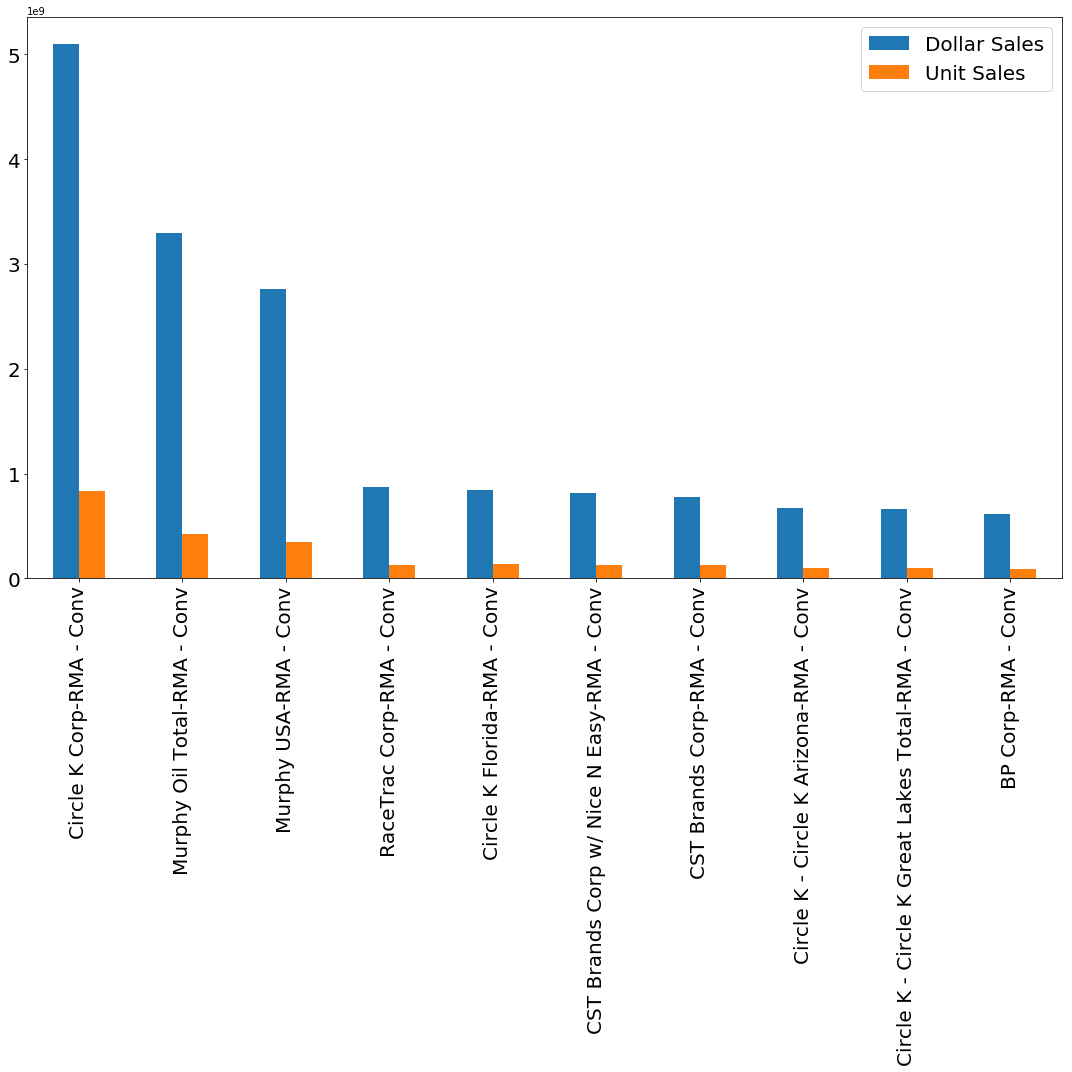

In [273]:
barplot_topk('Geography',df_Geo_SKU)

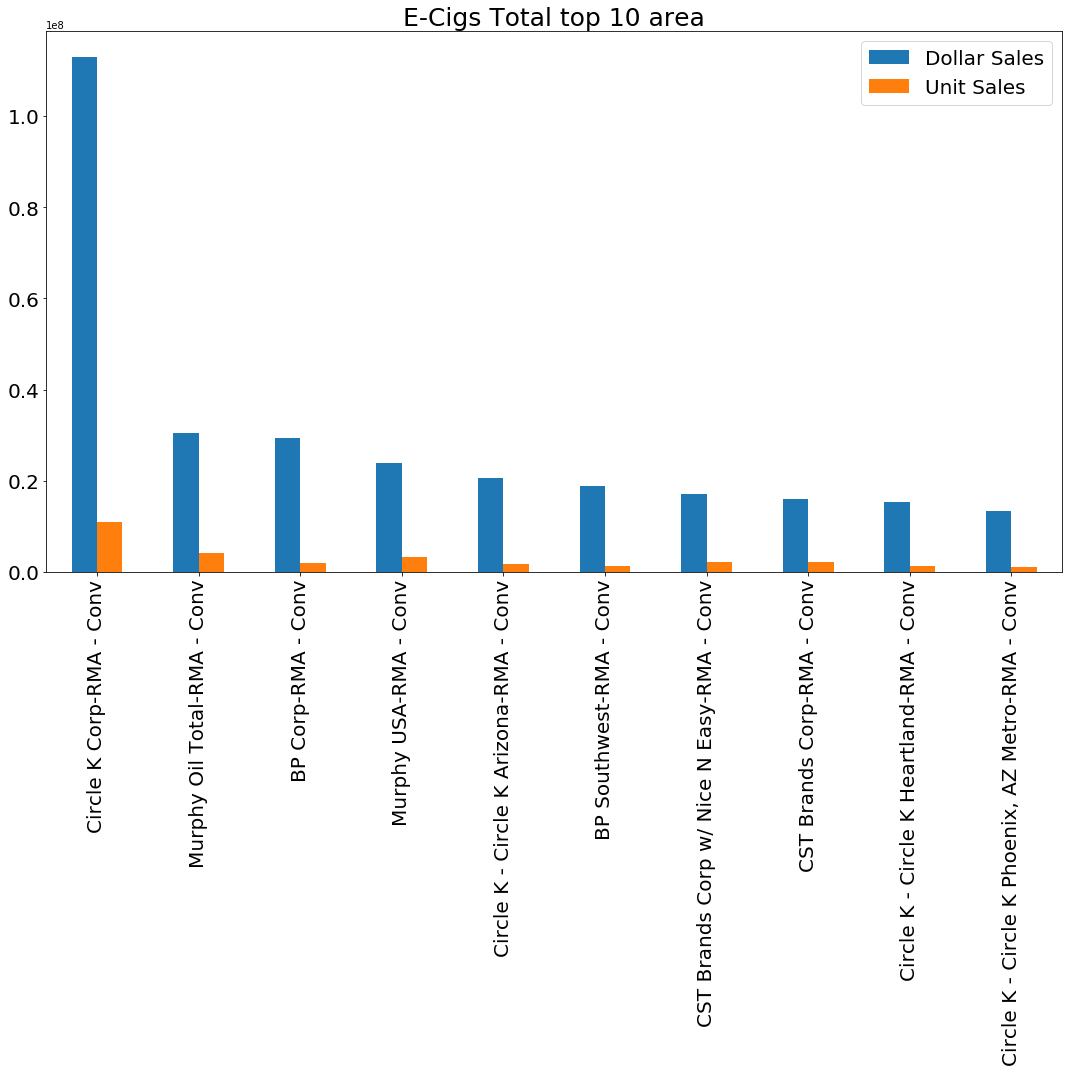

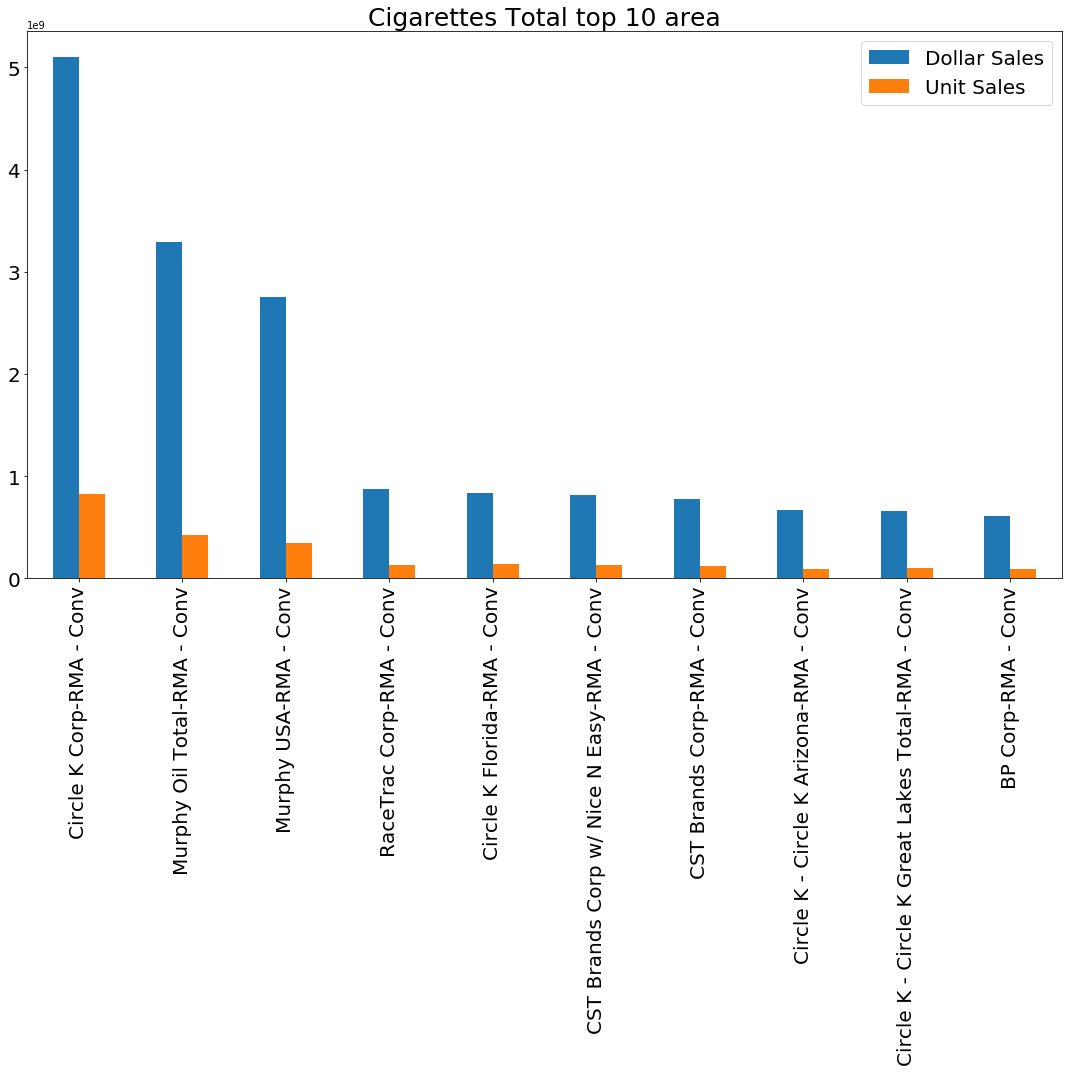

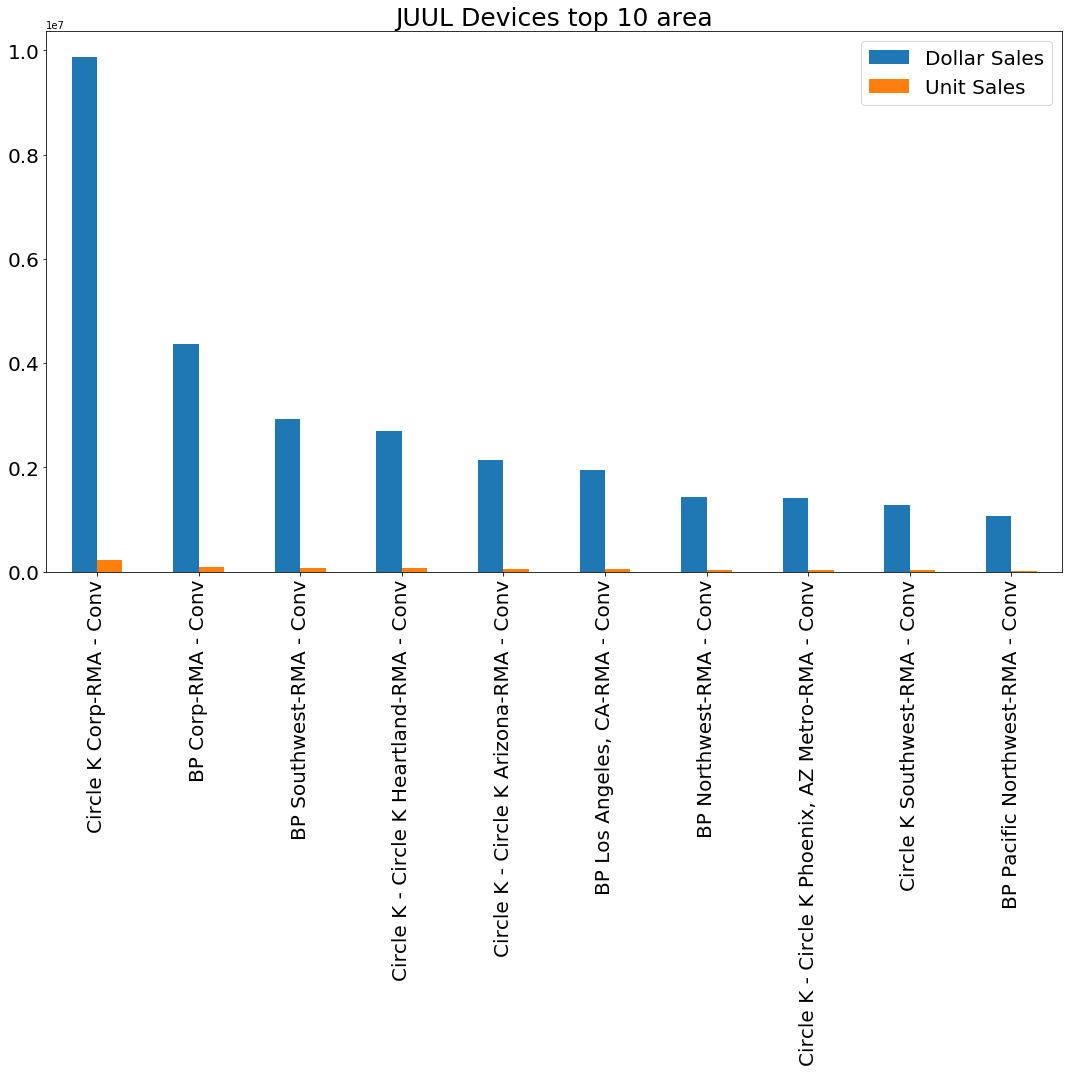

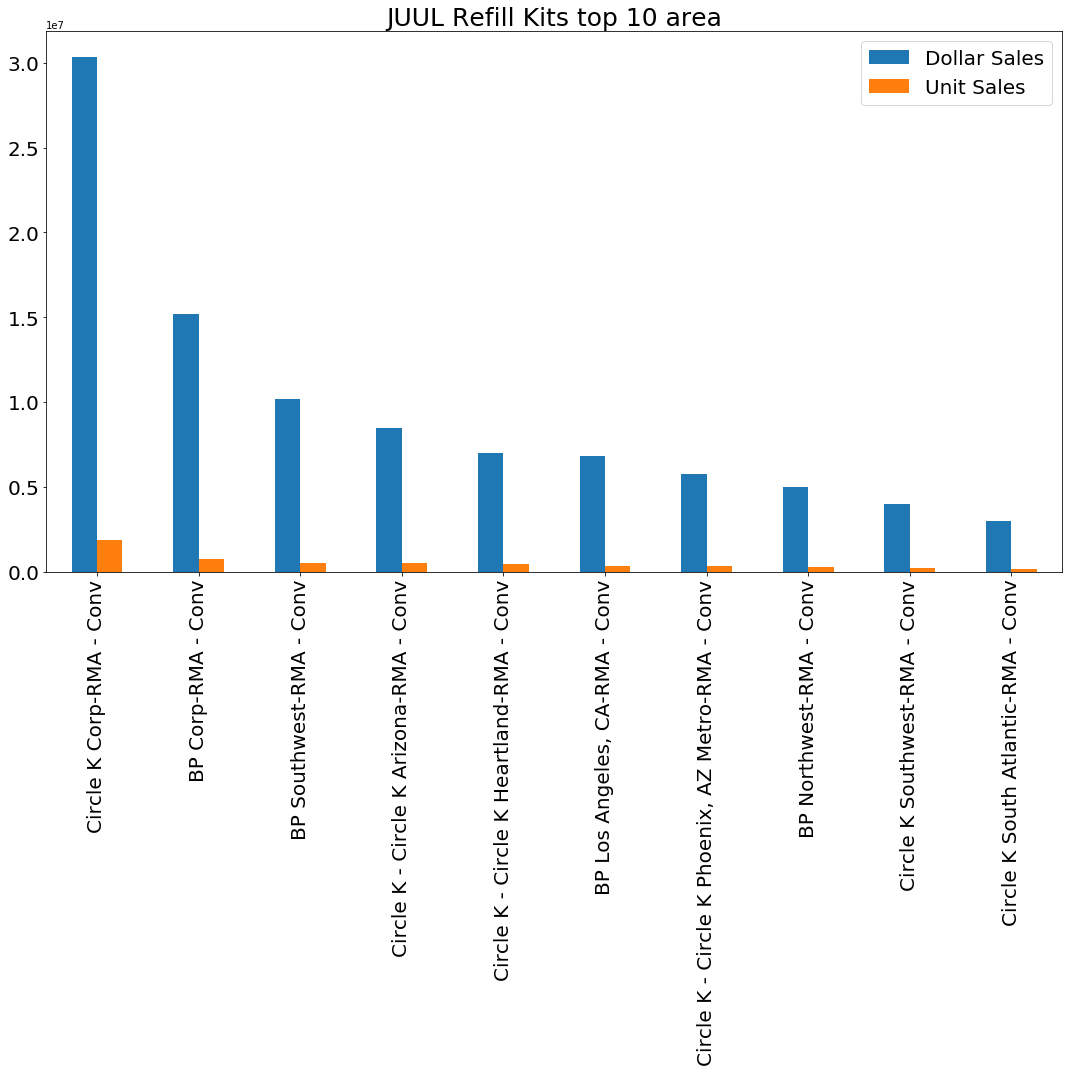

In [274]:
barplot_topk('Geography',df_Geo_SKU,SKU = 'E-Cigs Total',title = 'E-Cigs Total top 10 area')
barplot_topk('Geography',df_Geo_SKU,SKU = 'Cigarettes Total',title = 'Cigarettes Total top 10 area')
barplot_topk('Geography',df_Geo_SKU,SKU = 'JUUL Devices',title = 'JUUL Devices top 10 area')
barplot_topk('Geography',df_Geo_SKU,SKU = 'JUUL Refill Kits',title = 'JUUL Refill Kits top 10 area')


In [275]:
# add E-Cigs/Cigs Dollar Sales ratio, Jull Refill + Jull device/ E-Cigs Dollar Sales Ratio to df
def creat_df_Geo_ratio(df_Geo_SKU):
  df_Geo_ratio = pd.DataFrame(columns=['Geography', 'E_Cigs_dollar_ratio','E_Cigs_unit_ratio','JUUL_all_dollar_ratio','JUUL_all_unit_ratio','Cigarettes_Dollar_Total','Cigarettes_Unit_Total'])
  for i,item in enumerate(df_Geo_SKU['Geography'].unique()):
    df_temp = df_Geo_SKU[df_Geo_SKU['Geography'] == item]
    Cigarettes_Dollar_Total = df_temp[df_temp['SKU'] == 'Cigarettes Total']['Dollar Sales'].values[0]
    Cigarettes_Unit_Total = df_temp[df_temp['SKU'] == 'Cigarettes Total']['Unit Sales'].values[0]
    SKU_list = df_temp['SKU'].unique()
    if 'E-Cigs Total' in SKU_list and 'Cigarettes Total' in SKU_list:
      E_Cigs_dollar_ratio = df_temp[df_temp['SKU'] == 'E-Cigs Total']['Dollar Sales'].values[0] /df_temp[df_temp['SKU'] == 'Cigarettes Total']['Dollar Sales'].values[0]
      E_Cigs_unit_ratio = df_temp[df_temp['SKU'] == 'E-Cigs Total']['Unit Sales'].values[0] /df_temp[df_temp['SKU'] == 'Cigarettes Total']['Unit Sales'].values[0]
    else:
      E_Cigs_dollar_ratio = None
      E_Cigs_unit_ratio = None
    if 'E-Cigs Total' in SKU_list and ('JUUL Devices' in SKU_list or 'JUUL Refill Kits' in SKU_list):
      JUUL_all_unit_ratio = ((df_temp[df_temp['SKU'] == 'JUUL Devices']['Unit Sales'].values[0] if 'JUUL Devices' in SKU_list else 0) + (df_temp[df_temp['SKU'] == 'JUUL Refill Kits']['Unit Sales'].values[0] if 'JUUL Refill Kits' in SKU_list else 0))/df_temp[df_temp['SKU'] == 'E-Cigs Total']['Unit Sales'].values[0]
      JUUL_all_dollar_ratio = ((df_temp[df_temp['SKU'] == 'JUUL Devices']['Dollar Sales'].values[0] if 'JUUL Devices' in SKU_list else 0) + (df_temp[df_temp['SKU'] == 'JUUL Refill Kits']['Dollar Sales'].values[0] if 'JUUL Refill Kits' in SKU_list else 0))/df_temp[df_temp['SKU'] == 'E-Cigs Total']['Dollar Sales'].values[0]
    else:
      JUUL_all_unit_ratio = None
      JUUL_all_dollar_ratio = None
    df_Geo_ratio.loc[i] = [item,E_Cigs_dollar_ratio,E_Cigs_unit_ratio,JUUL_all_dollar_ratio,JUUL_all_unit_ratio,Cigarettes_Dollar_Total,Cigarettes_Unit_Total]
  return df_Geo_ratio



df_Geo_ratio = creat_df_Geo_ratio(df_Geo_SKU)
df_Geo_ratio.head()

,Geography,E_Cigs_dollar_ratio,E_Cigs_unit_ratio,JUUL_all_dollar_ratio,JUUL_all_unit_ratio,Cigarettes_Dollar_Total,Cigarettes_Unit_Total
0,Circle K Corp-RMA - Conv,0.022154,0.013263,0.355891,0.189111,5.098122e+09,8.311755e+08
1,Murphy Oil Total-RMA - Conv,0.009235,0.009944,0.0296608,0.0108348,3.291533e+09,4.217349e+08
2,Murphy USA-RMA - Conv,0.008624,0.009565,0.0136319,0.00487379,2.758897e+09,3.494733e+08
3,Circle K Florida-RMA - Conv,0.015069,0.010880,1.39009e-05,7.15872e-06,8.396653e+08,1.412307e+08
4,RaceTrac Corp-RMA - Conv,0.012671,0.010581,None,None,8.718517e+08,1.306176e+08


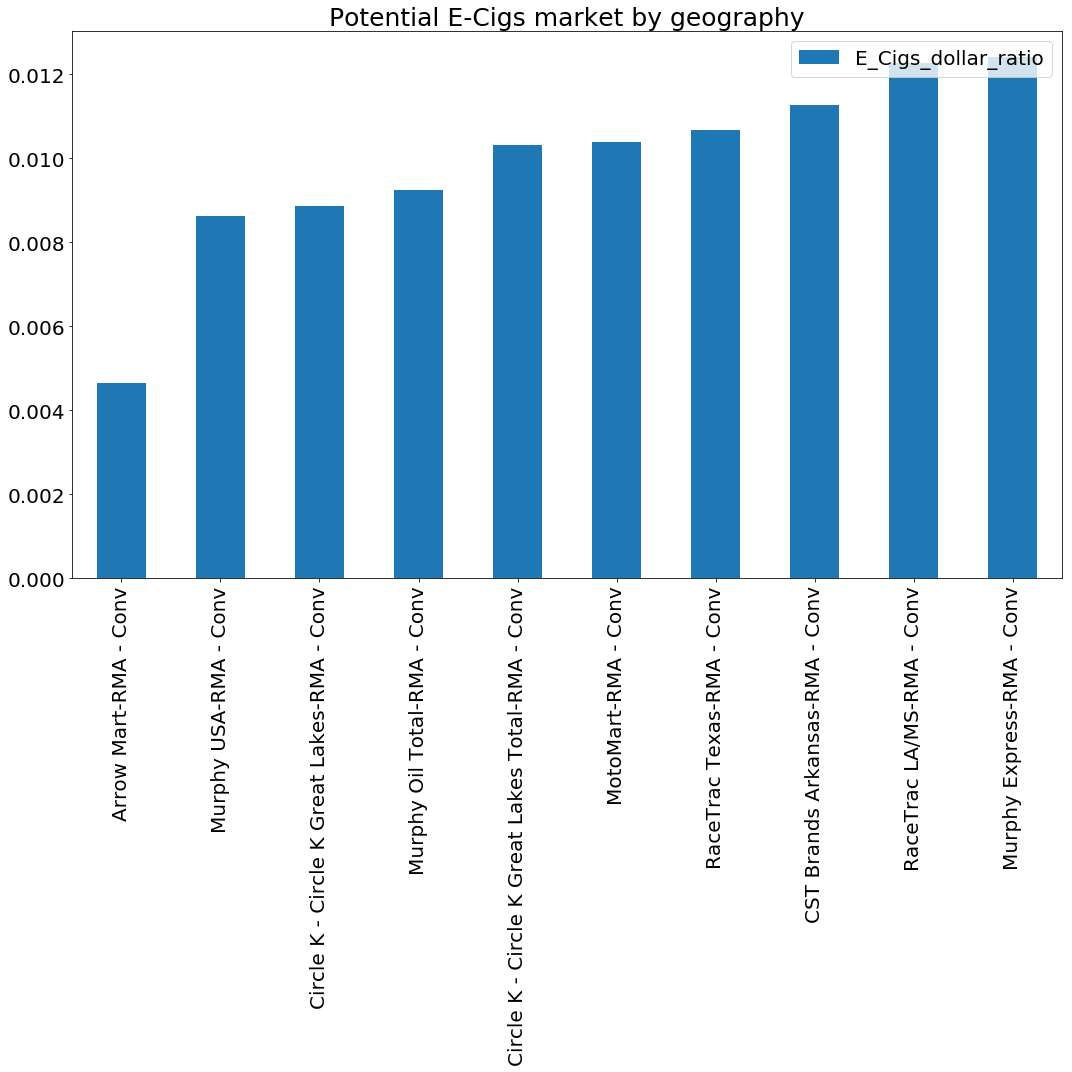

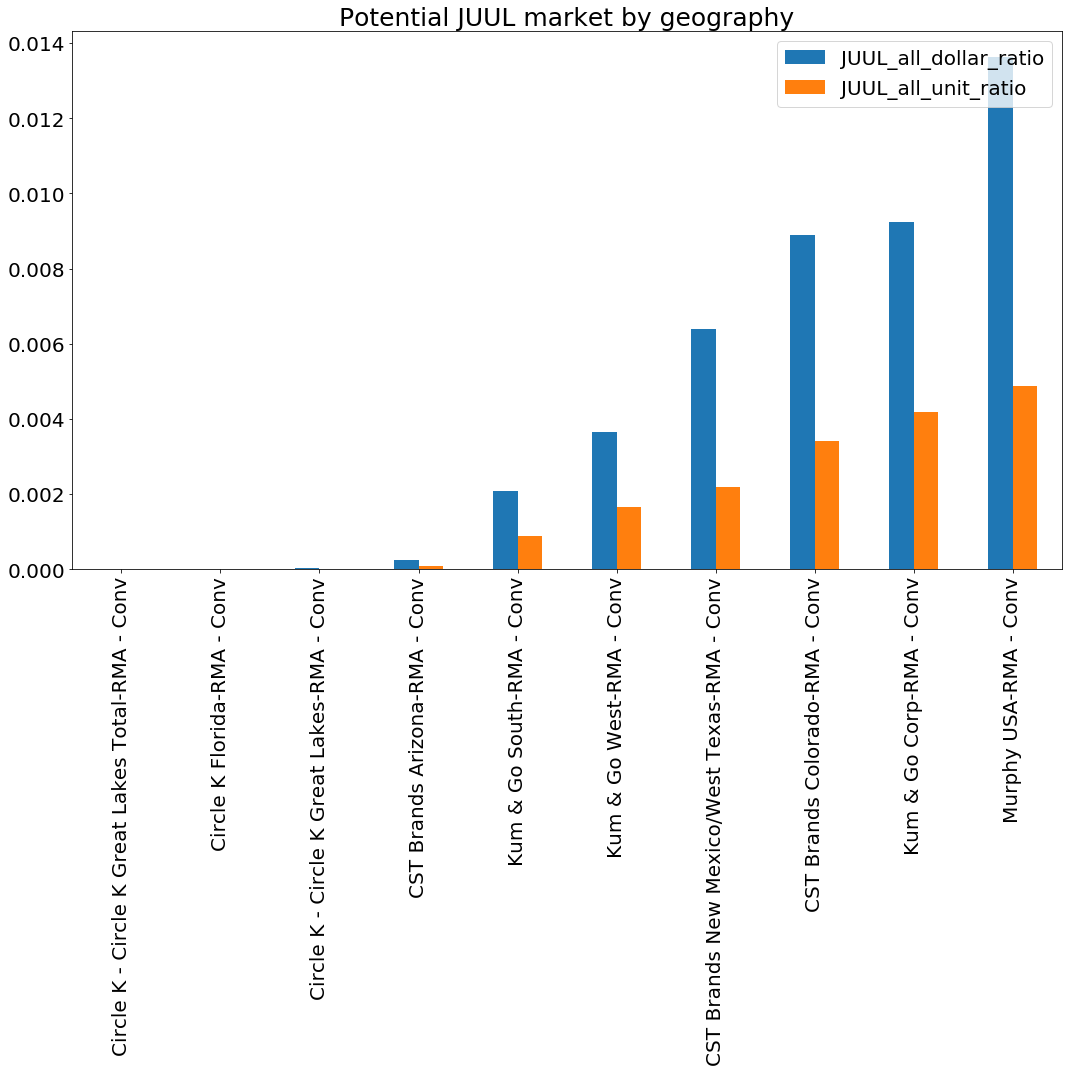

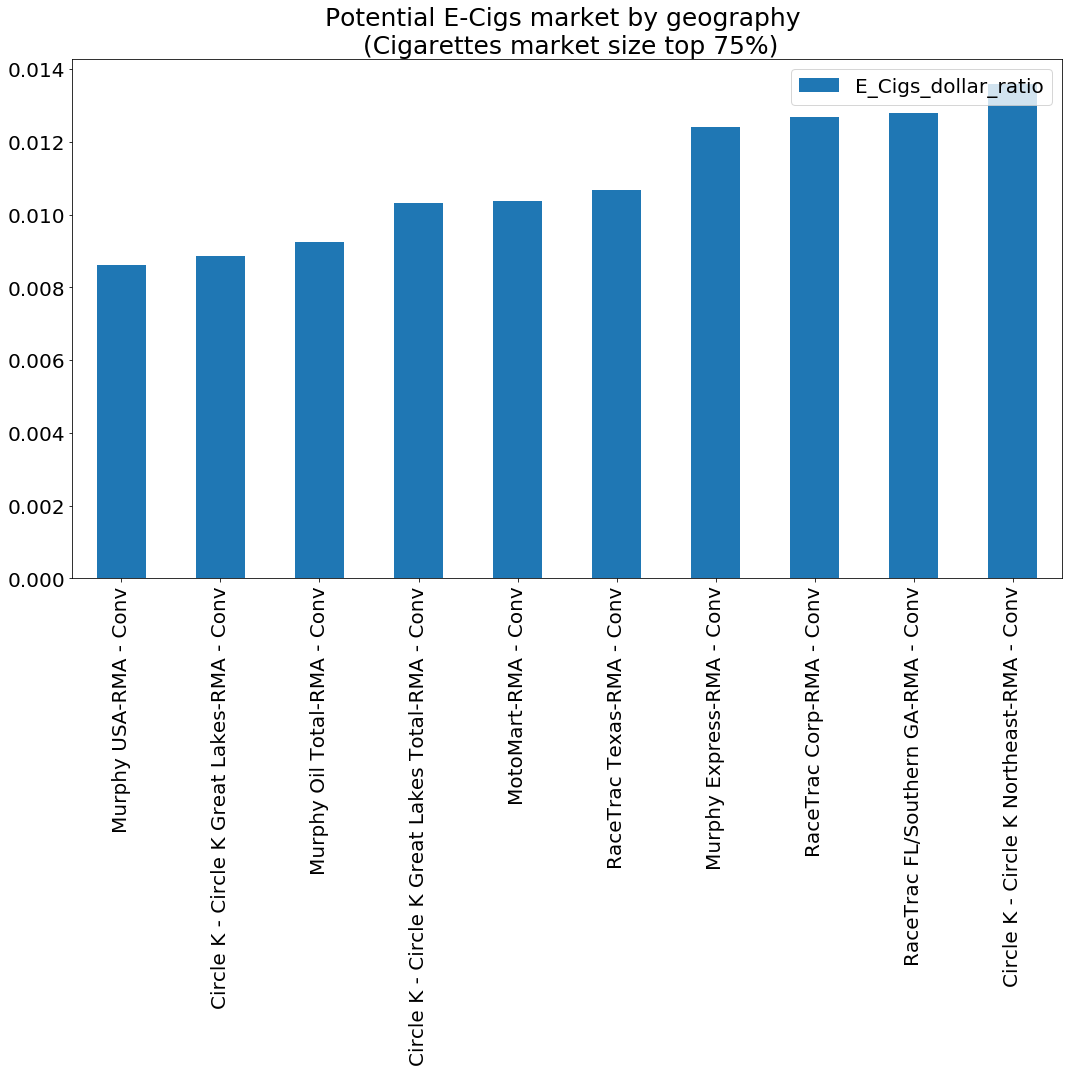

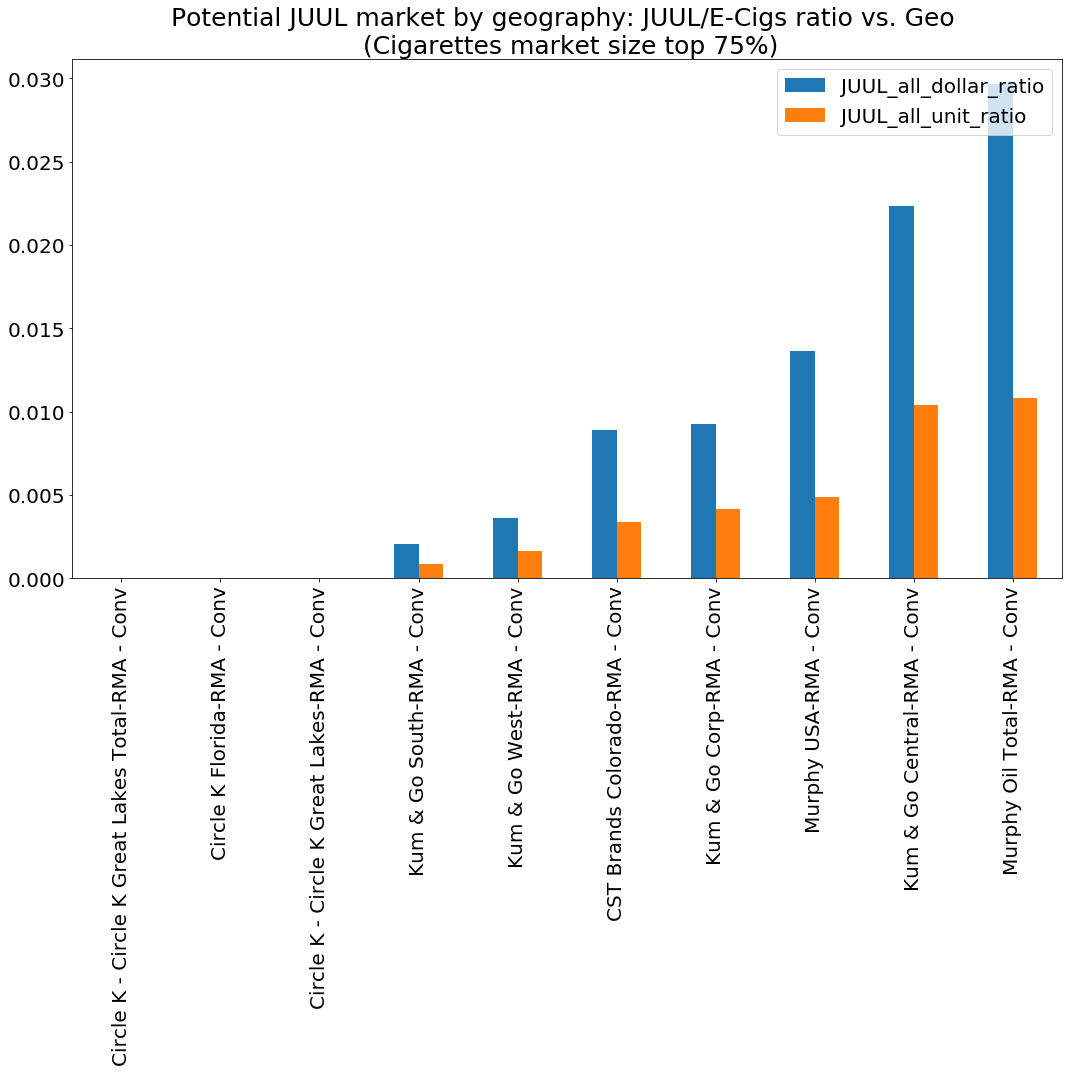

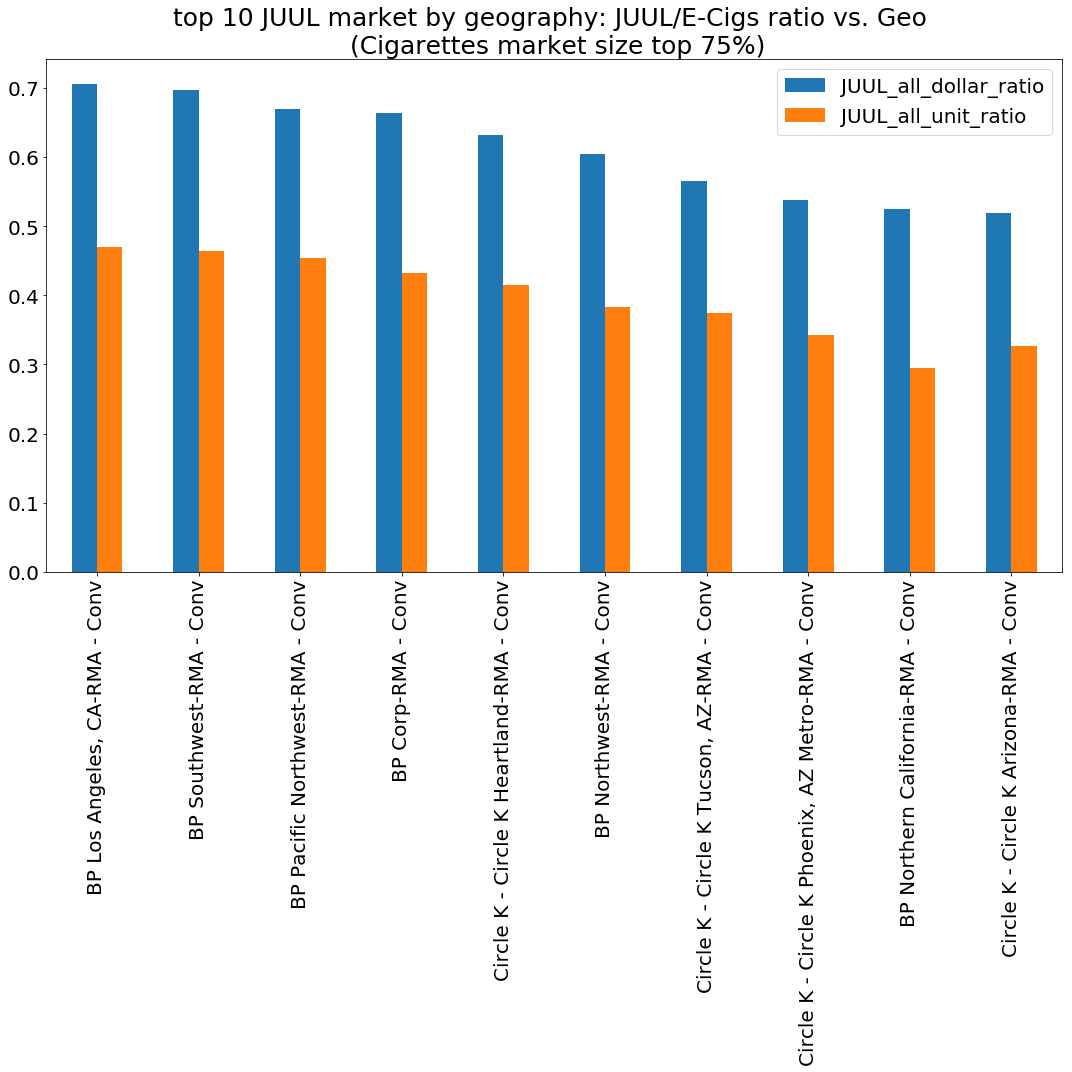

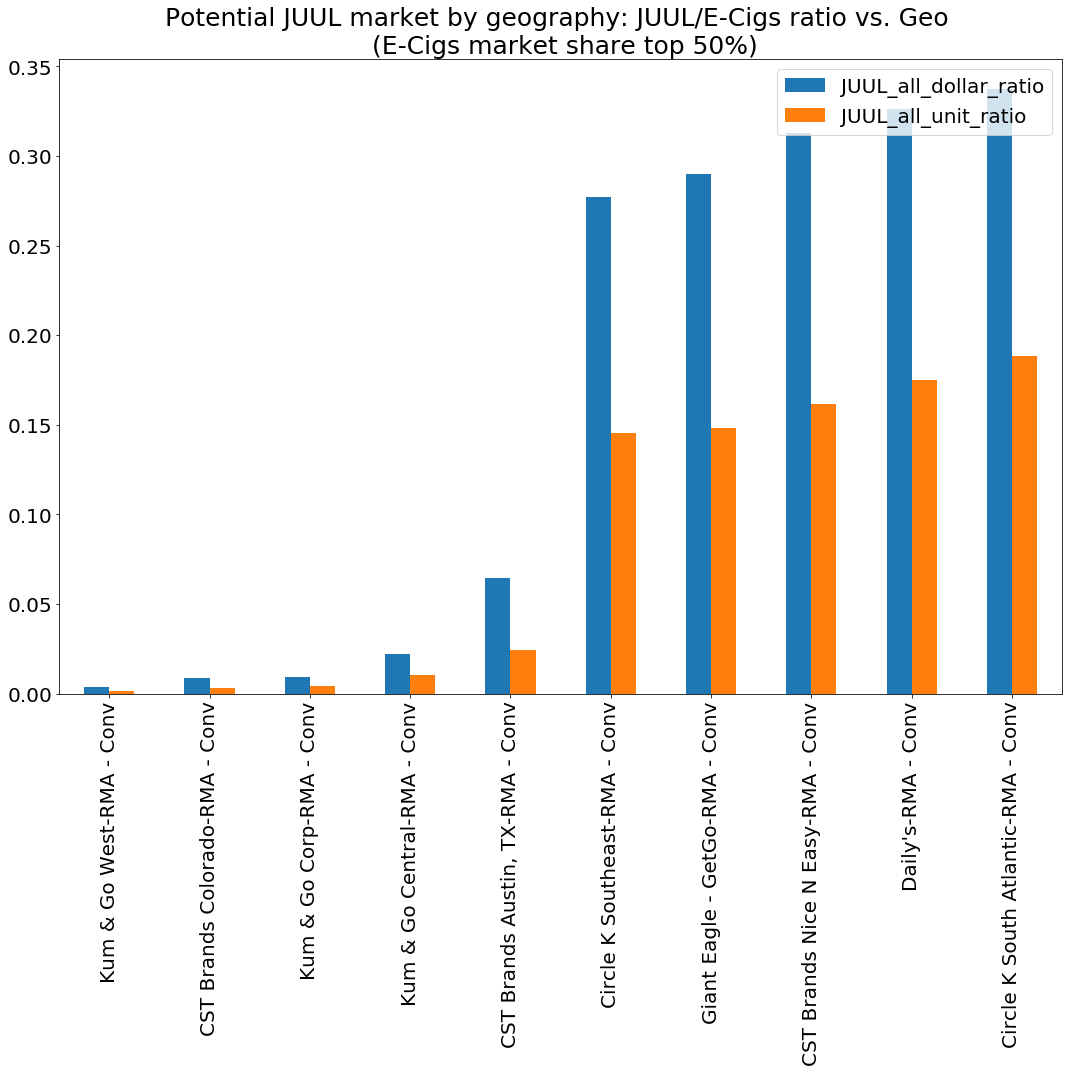

In [276]:
barplot_topk('Geography', df_Geo_ratio, sortby = 'E_Cigs_dollar_ratio',k=-10, y = ['E_Cigs_dollar_ratio'],title = 'Potential E-Cigs market by geography')
barplot_topk('Geography', df_Geo_ratio, sortby = 'JUUL_all_dollar_ratio',k=-10, y = ['JUUL_all_dollar_ratio', 'JUUL_all_unit_ratio'],title = 'Potential JUUL market by geography')
barplot_topk('Geography', df_Geo_ratio[df_Geo_ratio['Cigarettes_Dollar_Total']>8.28e+07], sortby = 'E_Cigs_dollar_ratio',k=-10, y = ['E_Cigs_dollar_ratio'],title = 'Potential E-Cigs market by geography \n (Cigarettes market size top 75%)')
barplot_topk('Geography', df_Geo_ratio[df_Geo_ratio['Cigarettes_Dollar_Total']>8.28e+07], sortby = 'JUUL_all_dollar_ratio',k=-10, y = ['JUUL_all_dollar_ratio', 'JUUL_all_unit_ratio'],title = 'Potential JUUL market by geography: JUUL/E-Cigs ratio vs. Geo \n (Cigarettes market size top 75%)')
barplot_topk('Geography', df_Geo_ratio[df_Geo_ratio['Cigarettes_Dollar_Total']>8.28e+07], sortby = 'JUUL_all_dollar_ratio',k=10, y = ['JUUL_all_dollar_ratio', 'JUUL_all_unit_ratio'],title = 'top 10 JUUL market by geography: JUUL/E-Cigs ratio vs. Geo \n (Cigarettes market size top 75%)')
barplot_topk('Geography', df_Geo_ratio[df_Geo_ratio['E_Cigs_dollar_ratio']>0.021056], sortby = 'JUUL_all_dollar_ratio',k=-10, y = ['JUUL_all_dollar_ratio', 'JUUL_all_unit_ratio'],title = 'Potential JUUL market by geography: JUUL/E-Cigs ratio vs. Geo \n (E-Cigs market share top 50%)')


In [277]:
df_Geo_ratio.Cigarettes_Dollar_Total.describe(), df_Geo_ratio.E_Cigs_dollar_ratio.describe(), df_Geo_ratio.JUUL_all_dollar_ratio.describe()

(count    5.800000e+01
 mean     4.396555e+08
 std      8.396888e+08
 min      9.908565e+06
 25%      8.280133e+07
 50%      1.722170e+08
 75%      4.607450e+08
 max      5.098122e+09
 Name: Cigarettes_Dollar_Total, dtype: float64, count    58.000000
 mean      0.024231
 std       0.012905
 min       0.004644
 25%       0.014019
 50%       0.021056
 75%       0.030578
 max       0.056454
 Name: E_Cigs_dollar_ratio, dtype: float64, count     46.000000
 unique    46.000000
 top        0.000013
 freq       1.000000
 Name: JUUL_all_dollar_ratio, dtype: float64)



---

# Explore within JUUL products
---



In [278]:
df_RMA.SKU.unique()

array(['Cigarettes Total', 'E-Cigs Total', 'JUUL Refill Kits',
       'JUUL Devices'], dtype=object)

In [279]:
df_JUUL_Kits = df_RMA[df_RMA.SKU == 'JUUL Refill Kits']
df_JUUL_Devices = df_RMA[df_RMA.SKU == 'JUUL Devices']
df_JUUL = df_RMA[(df_RMA.SKU == 'JUUL Devices') | (df_RMA.SKU == 'JUUL Refill Kits')]
len(df_JUUL_Kits) + len(df_JUUL_Devices), len(df_JUUL)

(3993, 3993)

In [307]:
len(df_JUUL_Devices.Geography.unique())

45

In [0]:
def df_groupby_time_product(df_raw):
  df = df_raw.groupby(by=['Time','Product'],as_index=False)['Dollar Sales', 'Unit Sales'].sum()
  df.Time = pd.to_datetime(df.Time)
  df = df.sort_values(by = 'Time', ascending=True)
  df = df.reset_index(drop=True)
  return(df)

#df_JUUL_Devices_Time = df_JUUL_Devices.groupby(by=['Time'],as_index=False)['Dollar Sales', 'Unit Sales'].sum()
#df_JUUL_Devices_Time.head()


In [281]:
df_JUUL_Devices_Time = df_groupby_time_product(df_JUUL_Devices)
df_JUUL_Kits_Time = df_groupby_time_product(df_JUUL_Kits)
df_JUUL_Devices_Time.head()

,Time,Product,Dollar Sales,Unit Sales
0,2016-01-31,JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT...,146153.684618,3672.761776
1,2016-02-28,JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT...,163306.786281,4087.405788
2,2016-03-27,JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT...,201820.225766,4974.941142
3,2016-04-24,JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT...,246573.128668,6171.707649
4,2016-05-22,JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT...,264397.519628,6527.973992


In [282]:
df_JUUL_Kits_Time.Product.unique()

array(['JUUL ELCTRNC SMKNG ACSRY TABAAC DISPOSABLE 4 CT - 0819913011421',
       'JUUL ELCTRNC SMKNG ACSRY MIINT DISPOSABLE 4 CT - 0819913011401',
       'JUUL ELCTRNC SMKNG ACSRY FRUUT DISPOSABLE 4 CT - 0819913011391',
       'JUUL ELCTRNC SMKNG ACSRY BRUULE DISPOSABLE 4 CT - 0819913011381',
       'JUUL ELCTRNC SMKNG ACSRY MANGO DISPOSABLE 4 CT - 0819913012441',
       'JUUL ELCTRNC SMKNG ACSRY ASSORTED DISPOSABLE 4 CT - 0819913011411'],
      dtype=object)

In [283]:
'''
def three_df_overlay_line_plot2(x,y1,df1,y2,df2,y3 = None,df3=None, title = '', legend = None): #legend is list type
  ax = df1.plot(x=x,y=y1,figsize  = (15,10),fontsize=20)
  df2.plot(ax=ax,x=x,y=y2,figsize  = (15,10),fontsize=20)
  if y3:
    df3.plot(ax=ax,x=x,y=y3,figsize  = (15,10),fontsize=20)
  ax.set_ylabel(y1, fontsize=20)
  ax.set_xlabel(x, fontsize=20)
  ax.set_title(title,fontsize = 25)
  
  ax.legend(legend,loc='upper left', fontsize = 20)  
  
  plt.tight_layout()
  '''

"\ndef three_df_overlay_line_plot2(x,y1,df1,y2,df2,y3 = None,df3=None, title = '', legend = None): #legend is list type\n  ax = df1.plot(x=x,y=y1,figsize  = (15,10),fontsize=20)\n  df2.plot(ax=ax,x=x,y=y2,figsize  = (15,10),fontsize=20)\n  if y3:\n    df3.plot(ax=ax,x=x,y=y3,figsize  = (15,10),fontsize=20)\n  ax.set_ylabel(y1, fontsize=20)\n  ax.set_xlabel(x, fontsize=20)\n  ax.set_title(title,fontsize = 25)\n  \n  ax.legend(legend,loc='upper left', fontsize = 20)  \n  \n  plt.tight_layout()\n  "

In [0]:
def overlay_line_plot(x,y,df_list,title = '', legend = None):
  df0 = df_list[0]
  ax = df0.plot(x=x,y=y,figsize  = (15,10),fontsize=20)
  for i in range(1,len(df_list)):
    df_list[i].plot(ax=ax,x=x,y=y,figsize  = (15,10),fontsize=20)
  ax.set_ylabel(y, fontsize=20)
  ax.set_xlabel(x, fontsize=20)
  ax.set_title(title,fontsize = 25)
  ax.legend(legend,loc='upper left', fontsize = 20) 
  plt.tight_layout()

In [285]:
df_JUUL_Devices_Time_Product_list = []
for product, df in df_JUUL_Devices_Time.groupby('Product'):
  df_JUUL_Devices_Time_Product_list.append(df)
for df in df_JUUL_Devices_Time_Product_list:
  print(df.iloc[0]['Product'])


JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT RECHARGEABLE 2 CT - 0819913011581
JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT RECHARGEABLE 3 CT - 0819913011371


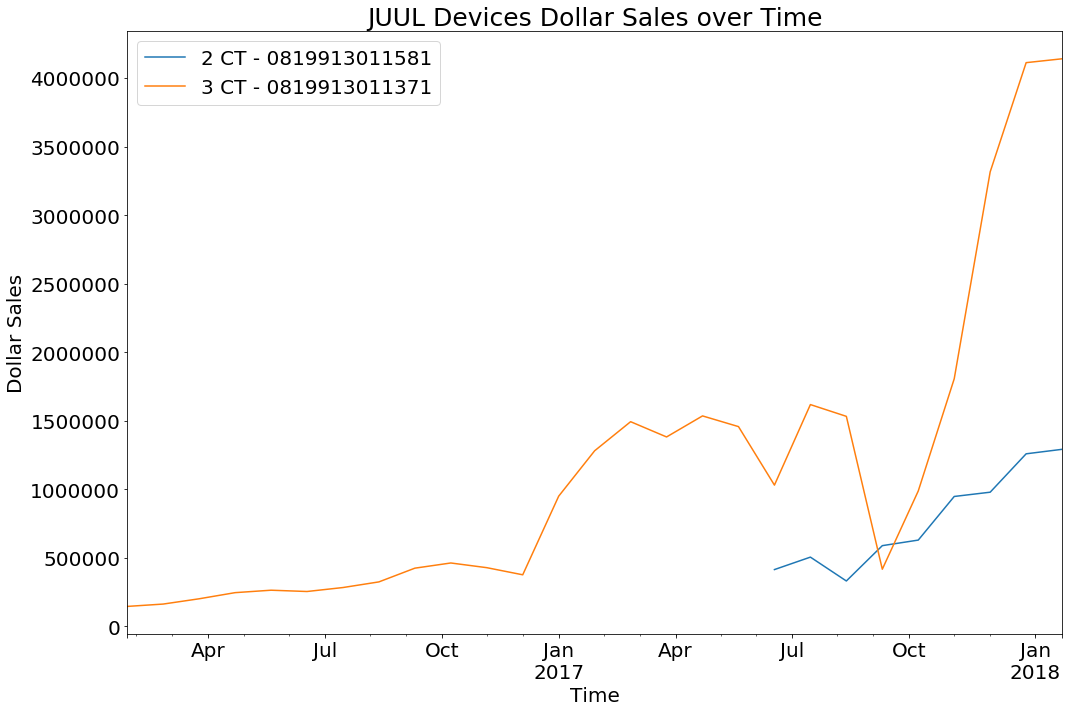

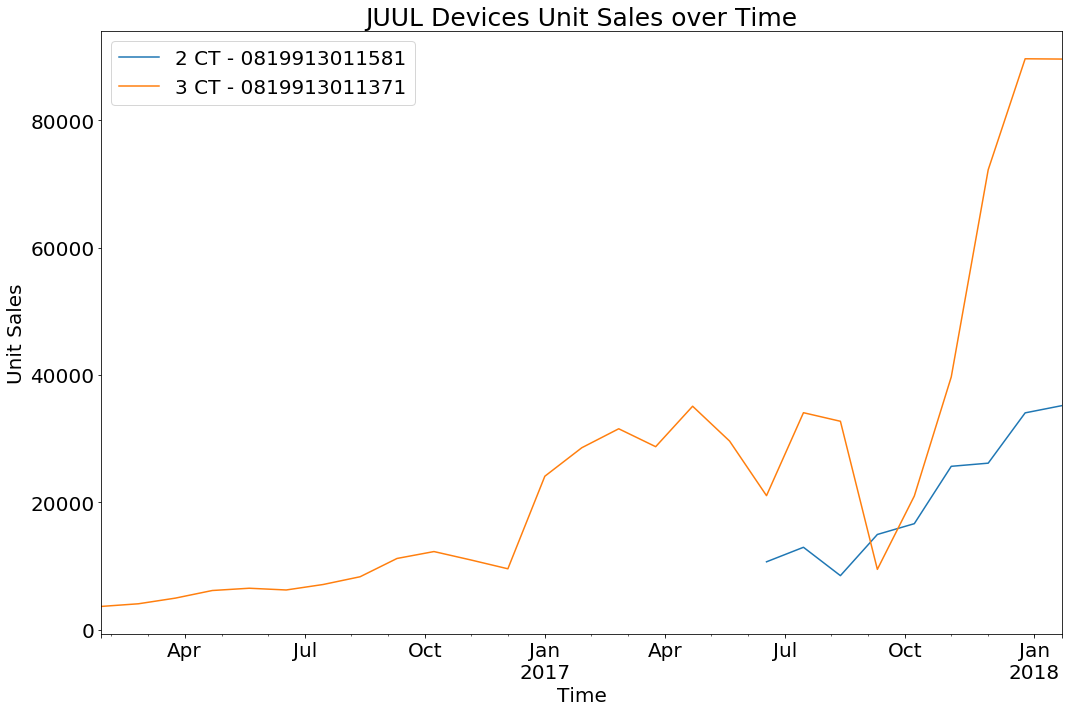

In [286]:
overlay_line_plot('Time','Dollar Sales',df_JUUL_Devices_Time_Product_list,title = 'JUUL Devices Dollar Sales over Time', legend = [ '2 CT - 0819913011581','3 CT - 0819913011371'])
overlay_line_plot('Time','Unit Sales',df_JUUL_Devices_Time_Product_list,title = 'JUUL Devices Unit Sales over Time', legend = [ '2 CT - 0819913011581','3 CT - 0819913011371'])

In [287]:
'''
df_JUUL_Devices_Time_1 = df_JUUL_Devices_Time[df_JUUL_Devices_Time['Product'] == 'JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT RECHARGEABLE 3 CT - 0819913011371']
df_JUUL_Devices_Time_2 = df_JUUL_Devices_Time[df_JUUL_Devices_Time['Product'] == 'JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT RECHARGEABLE 2 CT - 0819913011581']

three_df_overlay_line_plot2('Time','Dollar Sales',df_JUUL_Devices_Time_1,'Dollar Sales',df_JUUL_Devices_Time_2,y3 = None,df3=None, title = 'JUUL Devices Dollar Sales over Time',legend = ['3 CT - 0819913011371', '2 CT - 0819913011581'])
three_df_overlay_line_plot2('Time','Unit Sales',df_JUUL_Devices_Time_1,'Unit Sales',df_JUUL_Devices_Time_2,y3 = None,df3=None, title = 'JUUL Devices Unit Sales over Time',legend = ['3 CT - 0819913011371', '2 CT - 0819913011581'])
'''

"\ndf_JUUL_Devices_Time_1 = df_JUUL_Devices_Time[df_JUUL_Devices_Time['Product'] == 'JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT RECHARGEABLE 3 CT - 0819913011371']\ndf_JUUL_Devices_Time_2 = df_JUUL_Devices_Time[df_JUUL_Devices_Time['Product'] == 'JUUL ELECTRONIC SMKNG DVC ELECTRONIC CIGRTT KT RECHARGEABLE 2 CT - 0819913011581']\n\nthree_df_overlay_line_plot2('Time','Dollar Sales',df_JUUL_Devices_Time_1,'Dollar Sales',df_JUUL_Devices_Time_2,y3 = None,df3=None, title = 'JUUL Devices Dollar Sales over Time',legend = ['3 CT - 0819913011371', '2 CT - 0819913011581'])\nthree_df_overlay_line_plot2('Time','Unit Sales',df_JUUL_Devices_Time_1,'Unit Sales',df_JUUL_Devices_Time_2,y3 = None,df3=None, title = 'JUUL Devices Unit Sales over Time',legend = ['3 CT - 0819913011371', '2 CT - 0819913011581'])\n"

In [288]:
df_JUUL_Kits_Time_Product_list = []
products = []
for product, df in df_JUUL_Kits_Time.groupby('Product'):
  df_JUUL_Kits_Time_Product_list.append(df)
  products.append(product)
for df in df_JUUL_Kits_Time_Product_list:
  print(df.iloc[0]['Product'])

JUUL ELCTRNC SMKNG ACSRY ASSORTED DISPOSABLE 4 CT - 0819913011411
JUUL ELCTRNC SMKNG ACSRY BRUULE DISPOSABLE 4 CT - 0819913011381
JUUL ELCTRNC SMKNG ACSRY FRUUT DISPOSABLE 4 CT - 0819913011391
JUUL ELCTRNC SMKNG ACSRY MANGO DISPOSABLE 4 CT - 0819913012441
JUUL ELCTRNC SMKNG ACSRY MIINT DISPOSABLE 4 CT - 0819913011401
JUUL ELCTRNC SMKNG ACSRY TABAAC DISPOSABLE 4 CT - 0819913011421


In [289]:
print(products)

['JUUL ELCTRNC SMKNG ACSRY ASSORTED DISPOSABLE 4 CT - 0819913011411', 'JUUL ELCTRNC SMKNG ACSRY BRUULE DISPOSABLE 4 CT - 0819913011381', 'JUUL ELCTRNC SMKNG ACSRY FRUUT DISPOSABLE 4 CT - 0819913011391', 'JUUL ELCTRNC SMKNG ACSRY MANGO DISPOSABLE 4 CT - 0819913012441', 'JUUL ELCTRNC SMKNG ACSRY MIINT DISPOSABLE 4 CT - 0819913011401', 'JUUL ELCTRNC SMKNG ACSRY TABAAC DISPOSABLE 4 CT - 0819913011421']


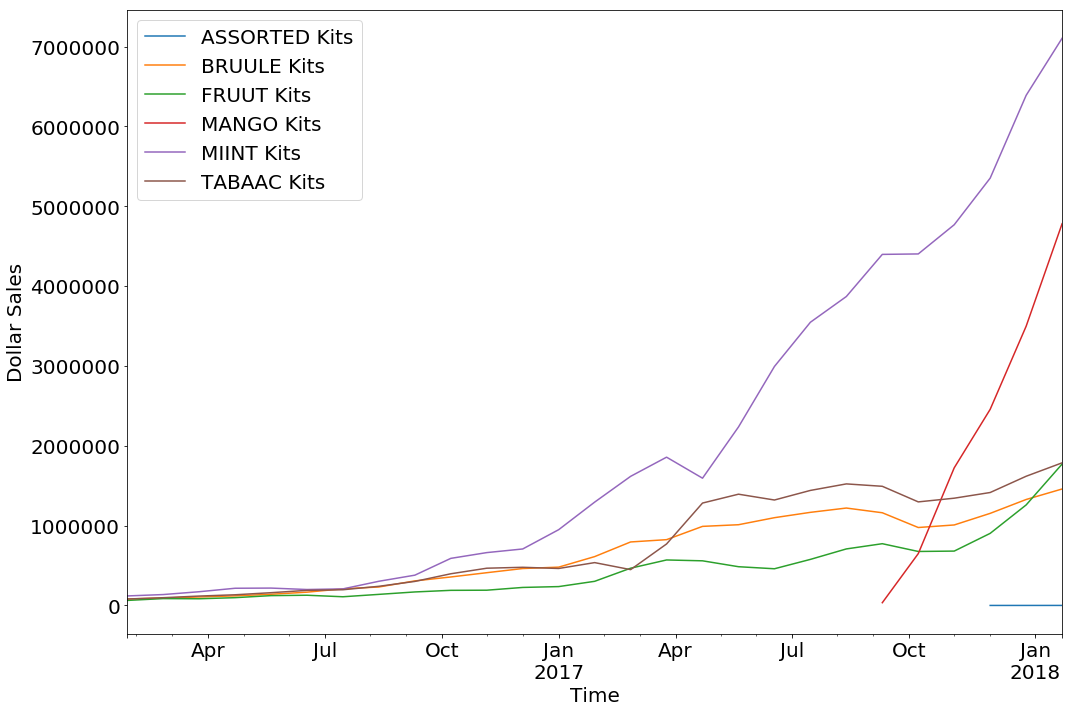

In [290]:
overlay_line_plot('Time','Dollar Sales',df_JUUL_Kits_Time_Product_list,title = '', legend = ['ASSORTED Kits','BRUULE Kits','FRUUT Kits','MANGO Kits','MIINT Kits','TABAAC Kits'])



---







In [310]:
df_JUUL_Kits_region = df_JUUL_Kits.groupby(by=['Geography','Product'],as_index=False)['Dollar Sales', 'Unit Sales'].sum()  #df_JUUL_Kits[df_JUUL_Kits['Time']>'2018-01-01']
df_JUUL_Kits_region.head()

,Geography,Product,Dollar Sales,Unit Sales
0,BP Arizona-RMA - Conv,JUUL ELCTRNC SMKNG ACSRY BRUULE DISPOSABLE 4 C...,107194.246702,6783.535277
1,BP Arizona-RMA - Conv,JUUL ELCTRNC SMKNG ACSRY FRUUT DISPOSABLE 4 CT...,4730.120000,288.000000
2,BP Arizona-RMA - Conv,JUUL ELCTRNC SMKNG ACSRY MANGO DISPOSABLE 4 CT...,169.920000,8.000000
3,BP Arizona-RMA - Conv,JUUL ELCTRNC SMKNG ACSRY MIINT DISPOSABLE 4 CT...,398205.565580,24955.029742
4,BP Arizona-RMA - Conv,JUUL ELCTRNC SMKNG ACSRY TABAAC DISPOSABLE 4 C...,153771.129734,9839.360834


In [311]:
len(df_JUUL_Kits_region.Geography.unique()), len(df_JUUL_Kits.Geography.unique())

(46, 46)

In [292]:
'''
df_total = df_JUUL_Kits_region.groupby(by=['Geography'], as_index=False)['Dollar Sales'].sum()
count=0
for geo, df_geo in df_JUUL_Kits_region.groupby('Geography'):
  if count>2:
    break
  count +=1
  df_temp = pd.DataFrame(columns=['Geography','ASSORTED PCT','BRUULE PCT','FRUUT PCT','MANGO PCT','MIINT PCT','TABAAC PCT'])
  df_temp['Geography'] = [geo]
  for product in df_geo['Product']:
    if 'ASSORTED' in product:
      df_temp['ASSORTED PCT'] = [df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]]
    elif 'BRUULE' in product:
      df_temp['BRUULE PCT'] = [df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]]
    elif 'FRUUT' in product:
#      df_temp[0]['FRUUT PCT'] = df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]
#    elif 'MANGO' in product:
#      df_temp[0]['MANGO PCT'] = df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]
#    elif 'MIINT' in product:
#      df_temp[0]['MIINT PCT'] = df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]
#    elif 'TABAAC' in product:
#      df_temp[0]['TABAAC PCT'] = df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]
  print(df_temp.head())
  '''

IndentationError: ignored

In [0]:
def df_add_kit_pct(df):
  df_total = df.groupby(by=['Geography'], as_index=False)['Dollar Sales'].sum()
  df_res = pd.DataFrame(columns=['Geography','ASSORTED PCT','BRUULE PCT','FRUUT PCT','MANGO PCT','MIINT PCT','TABAAC PCT'])
  for geo, df_geo in df.groupby('Geography'):
    df_temp = pd.DataFrame(columns=['Geography','ASSORTED PCT','BRUULE PCT','FRUUT PCT','MANGO PCT','MIINT PCT','TABAAC PCT'])
    df_temp['Geography'] = [geo]
    for product in df_geo['Product']:
      if 'ASSORTED' in product:
        df_temp['ASSORTED PCT'] = [df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]]
      elif 'BRUULE' in product:
        df_temp['BRUULE PCT'] = [df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]]
      elif 'FRUUT' in product:
        df_temp['FRUUT PCT'] = [df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]]
      elif 'MANGO' in product:
        df_temp['MANGO PCT'] = [df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]]
      elif 'MIINT' in product:
        df_temp['MIINT PCT'] = [df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]]
      elif 'TABAAC' in product:
        df_temp['TABAAC PCT'] = [df_geo[df_geo['Product'] == product]['Dollar Sales'].values[0] / df_total[df_total['Geography'] == geo]['Dollar Sales'].values[0]]
    #print(df_temp.head())
    df_res = df_res.append(df_temp)
   
  df_res = df_res.reset_index(drop=True)
  
  return df_res

In [313]:
df_kit_pct = df_add_kit_pct(df_JUUL_Kits_region)
df_kit_pct[:20], len(df_kit_pct)

(                                            Geography  ... TABAAC PCT
 0                               BP Arizona-RMA - Conv  ...   0.231558
 1              BP Central/South California-RMA - Conv  ...   0.169388
 2                                  BP Corp-RMA - Conv  ...   0.196011
 3                       BP Los Angeles, CA-RMA - Conv  ...   0.207915
 4                                BP Nevada-RMA - Conv  ...   0.181035
 5                   BP Northern California-RMA - Conv  ...   0.242699
 6                             BP Northwest-RMA - Conv  ...   0.187543
 7                     BP Pacific Northwest-RMA - Conv  ...   0.146773
 8                             BP Southwest-RMA - Conv  ...   0.200187
 9                       CST Brands Arizona-RMA - Conv  ...        NaN
 10                   CST Brands Austin, TX-RMA - Conv  ...  0.0929622
 11                CST Brands Central Texas-RMA - Conv  ...  0.0613905
 12                     CST Brands Colorado-RMA - Conv  ...    0.10425
 13   

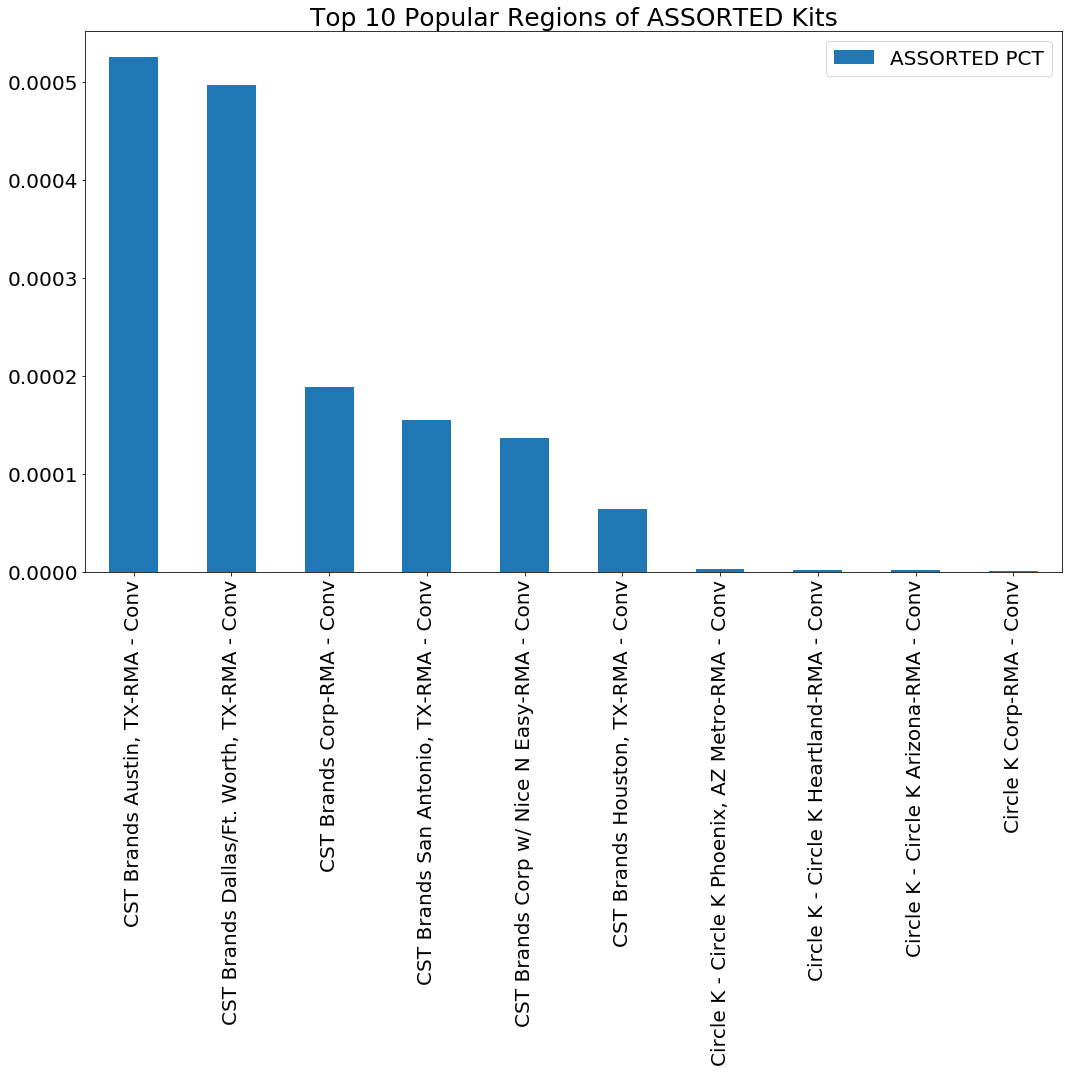

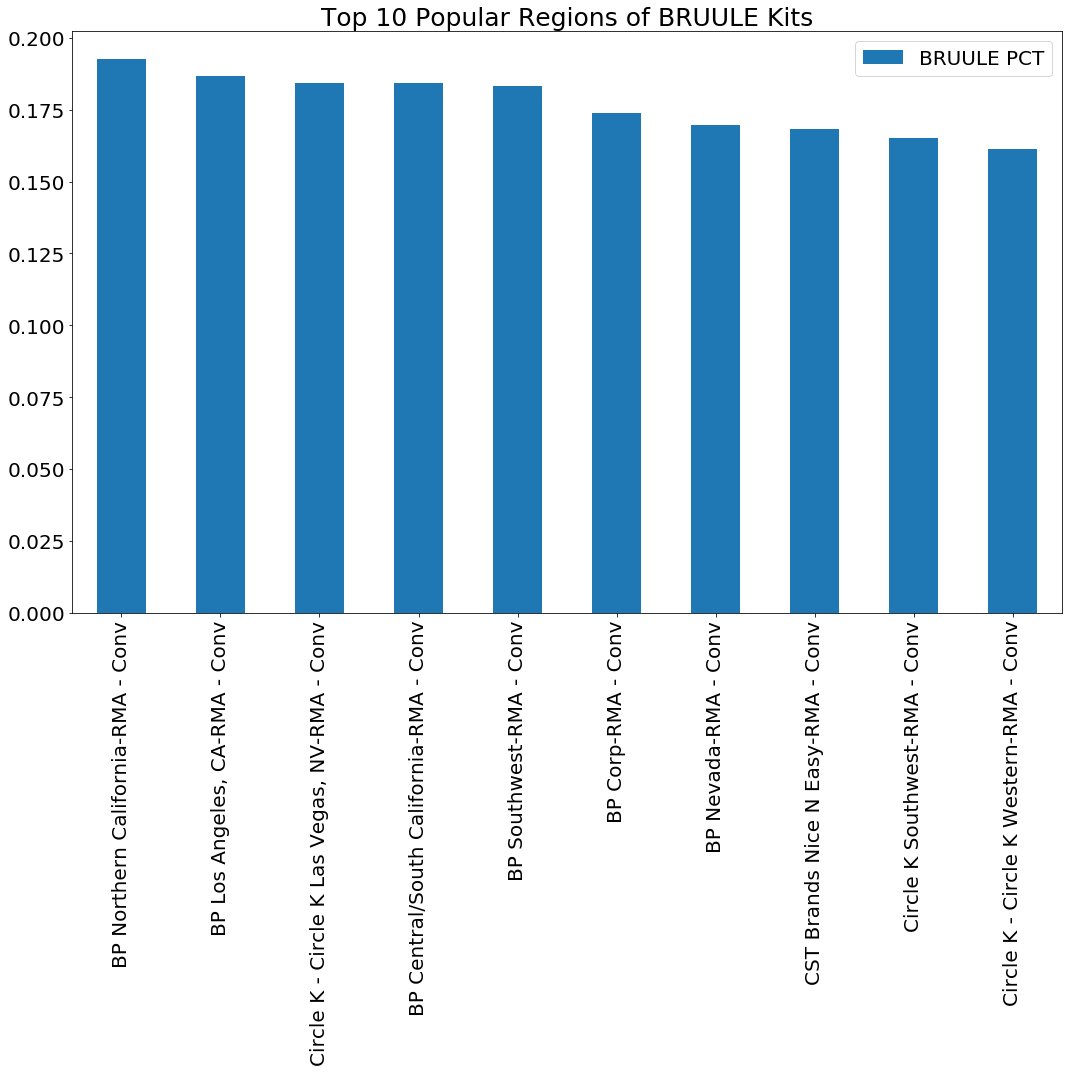

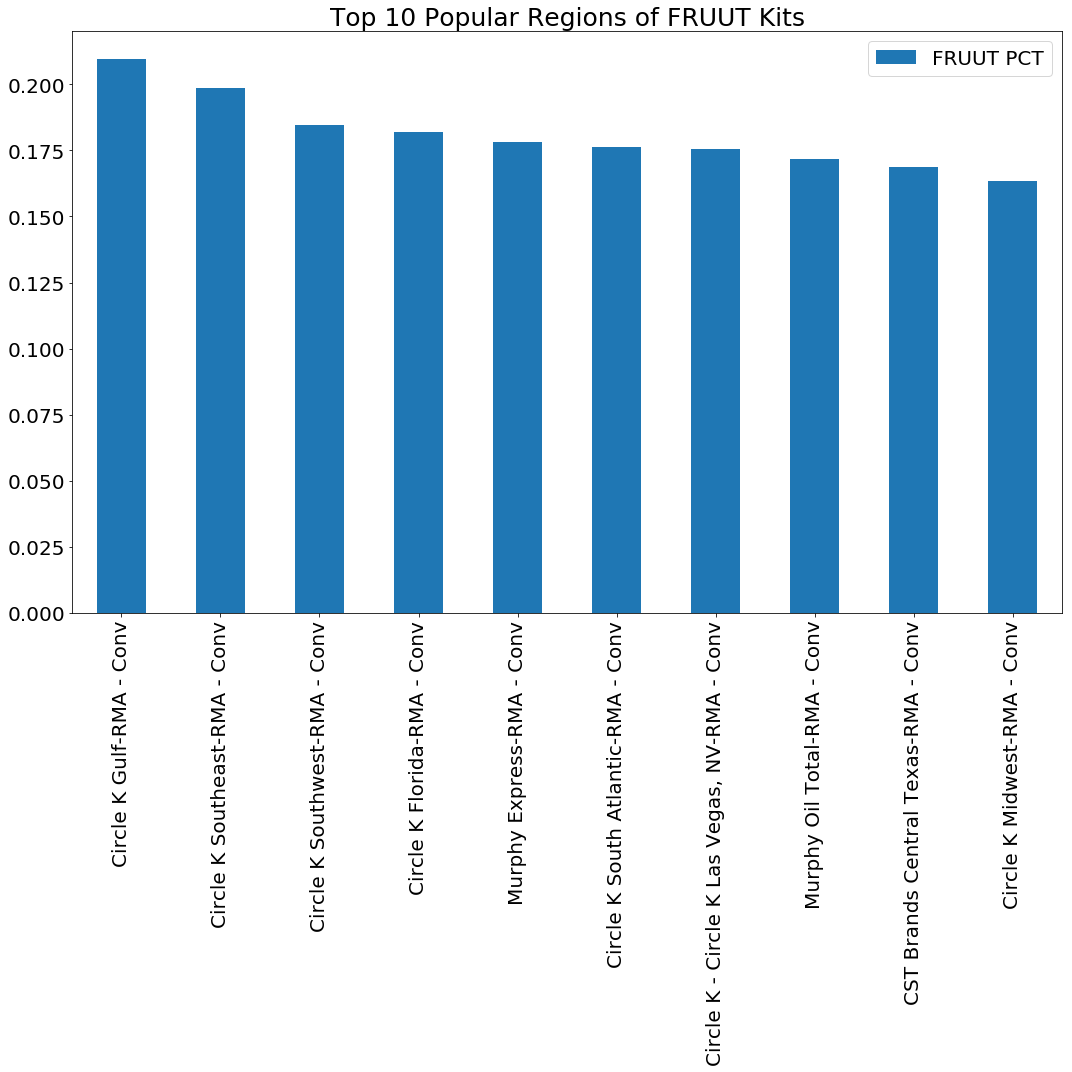

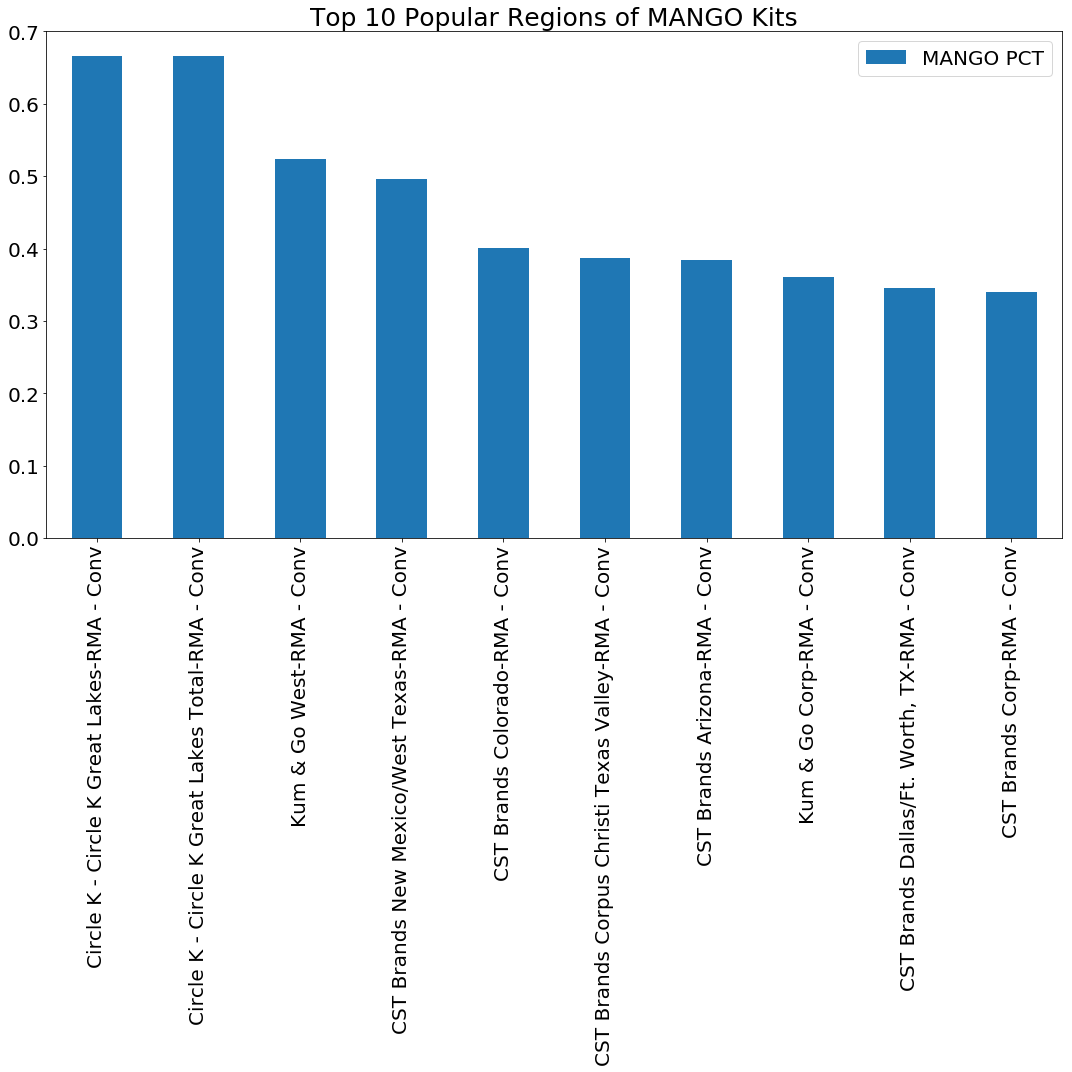

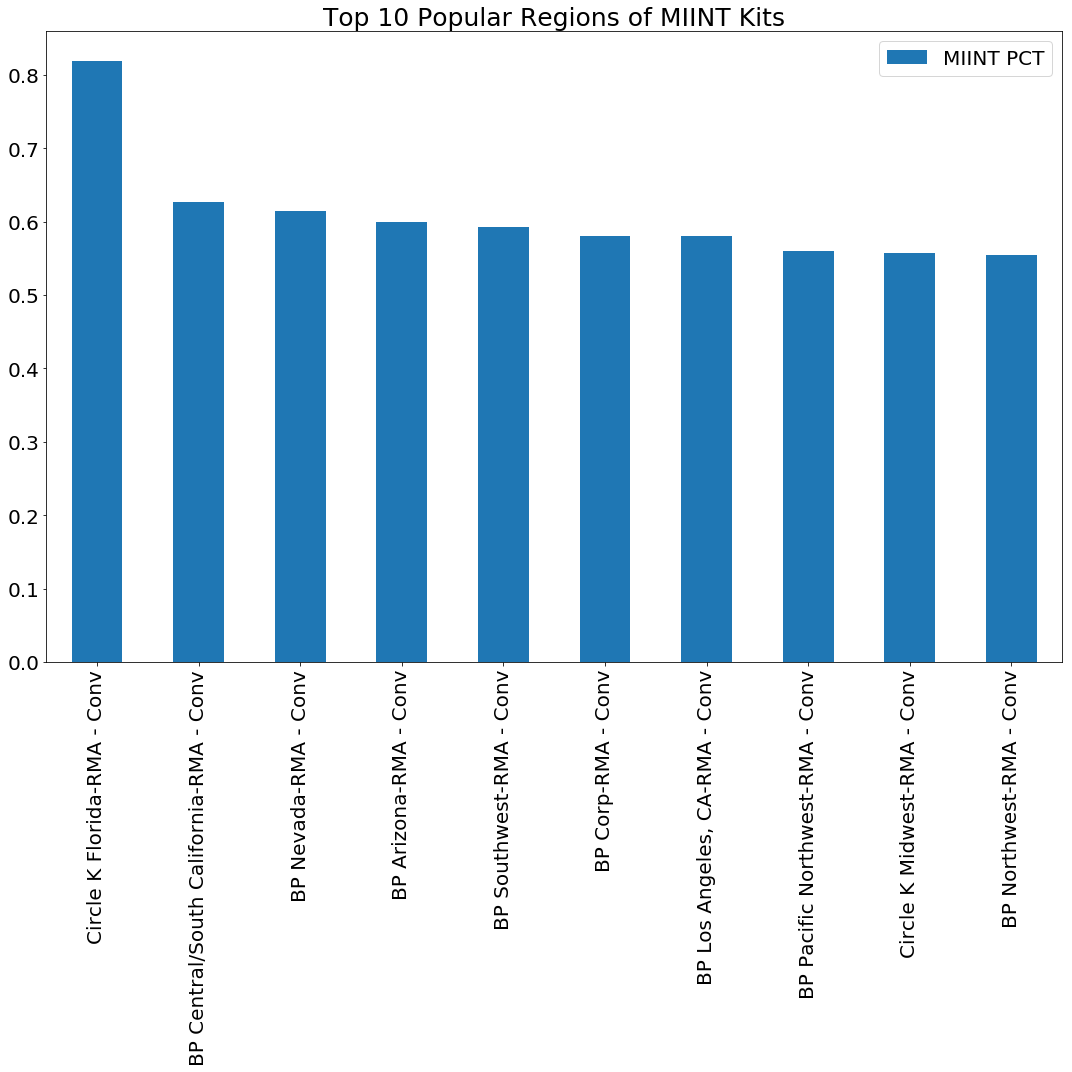

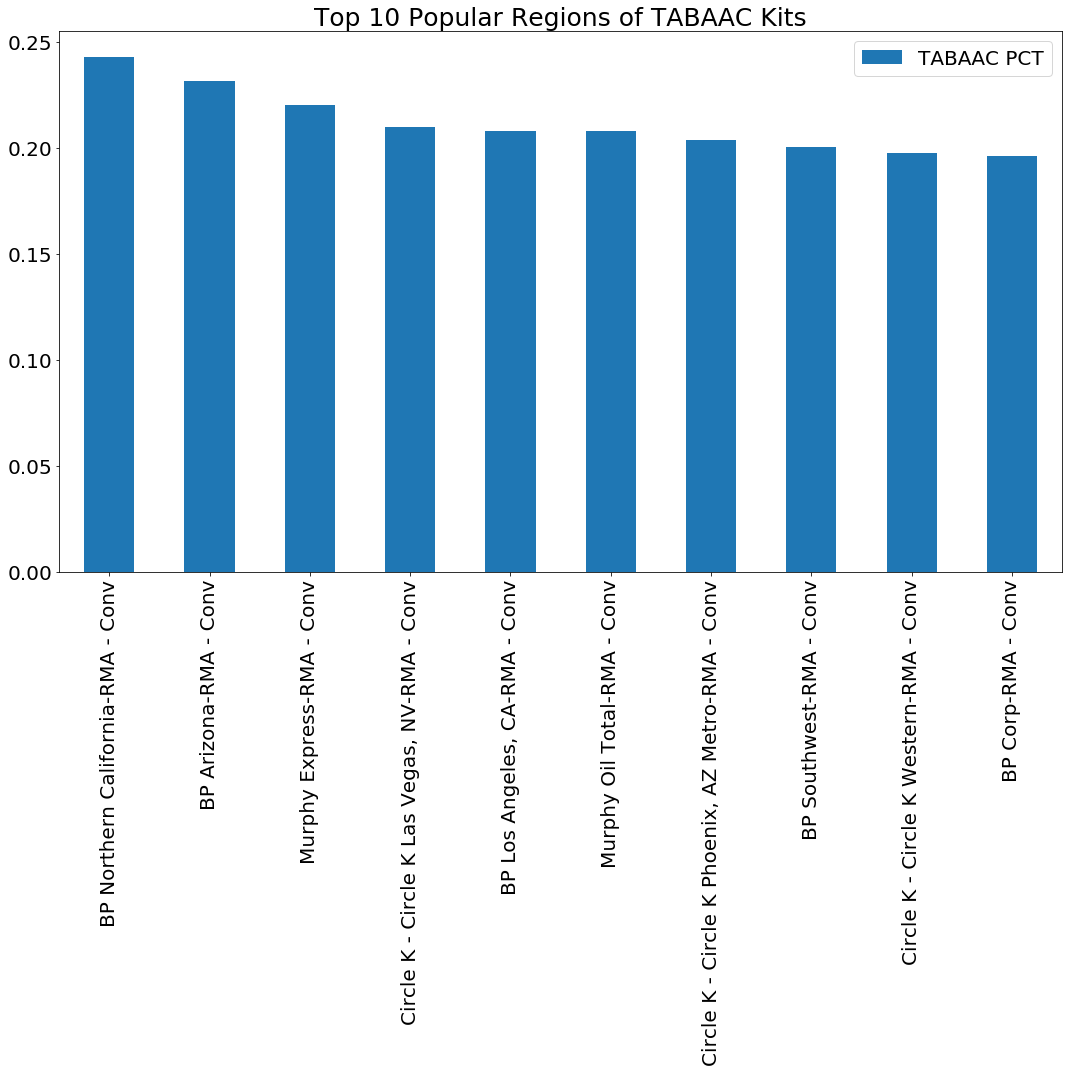

In [316]:
barplot_topk('Geography', df_kit_pct, sortby = 'ASSORTED PCT',y=['ASSORTED PCT'],title='Top 10 Popular Regions of ASSORTED Kits')
barplot_topk('Geography', df_kit_pct, sortby = 'BRUULE PCT',y=['BRUULE PCT'],title='Top 10 Popular Regions of BRUULE Kits')
barplot_topk('Geography', df_kit_pct, sortby = 'FRUUT PCT',y=['FRUUT PCT'],title='Top 10 Popular Regions of FRUUT Kits')
barplot_topk('Geography', df_kit_pct, sortby = 'MANGO PCT',y=['MANGO PCT'],title='Top 10 Popular Regions of MANGO Kits')
barplot_topk('Geography', df_kit_pct, sortby = 'MIINT PCT',y=['MIINT PCT'],title='Top 10 Popular Regions of MIINT Kits')
barplot_topk('Geography', df_kit_pct, sortby = 'TABAAC PCT',y=['TABAAC PCT'],title='Top 10 Popular Regions of TABAAC Kits')
